In [1]:
import pandas as pd
from datetime import datetime   # 패키지 - 모듈 (이름 같음)
import pandas as pd   # csv file read
import matplotlib.pyplot as plt   # 시계열 시각화
from sklearn.preprocessing import LabelEncoder # 인코딩
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False
plt.rcParams['axes.unicode_minus'] =False
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
import os
plt.style.use('ggplot')
import pandas as pd
from datetime import datetime   # 패키지 - 모듈 (이름 같음)
import pandas as pd   # csv file read
import matplotlib.pyplot as plt   # 시계열 시각화
from sklearn.preprocessing import LabelEncoder # 인코딩
import numpy as np
import statsmodels.api as sm
pd.options.display.float_format = '{:.2f}'.format
import datetime
plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
import os
plt.style.use('ggplot')


C:\Users\yjhon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\yjhon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv('C:/Users/yjhon/OneDrive/바탕 화면/조달청_공모전/Regression_timeseries/물품용역공사_2017_2021.xls',index_col='공고게시일자')

In [3]:
df.index = df.index.astype(str)

df.index = pd.to_datetime(df.index)

In [4]:
water_df = df[df.수요기관명 == "한국수자원공사"] # 용역
water_df_service = water_df[water_df.대상 == "용역"]

In [5]:
col_name = ["추정가격"]
water_service = pd.DataFrame(data = water_df_service,columns = col_name)

In [6]:
water_service['date'] = water_service.index
water_service.dtypes

water_service['date'] = water_service['date'].astype(str)

water_service['date'] = pd.to_datetime(water_service['date'])

water_groups = water_service.groupby(["date"]).추정가격.sum()
water_group_df = pd.DataFrame(data=water_groups, index = water_groups.index)

water_group_df.tail()

,추정가격
date,
2021-12-27,162250600.00
2021-12-28,306701000.00
2021-12-29,361531000.00
2021-12-30,689758200.00
2021-12-31,3045898000.00


In [7]:
water_sample = water_group_df.resample(rule='w').sum()

In [8]:
water_sample = water_sample[water_sample.추정가격!=0] # 0값 제외한 데이터프레임

In [9]:
water_sample

,추정가격
date,
2018-04-08,1213394500.00
2018-04-15,2100809455.00
2018-04-22,5161653780.00
2018-04-29,1889171056.00
2018-05-06,8386696600.00
...,...
2021-12-05,15323871280.00
2021-12-12,15572623196.00
2021-12-19,23078195505.00


Text(0.5, 1.0, '한국수자원공사 용역 추정가격_week')

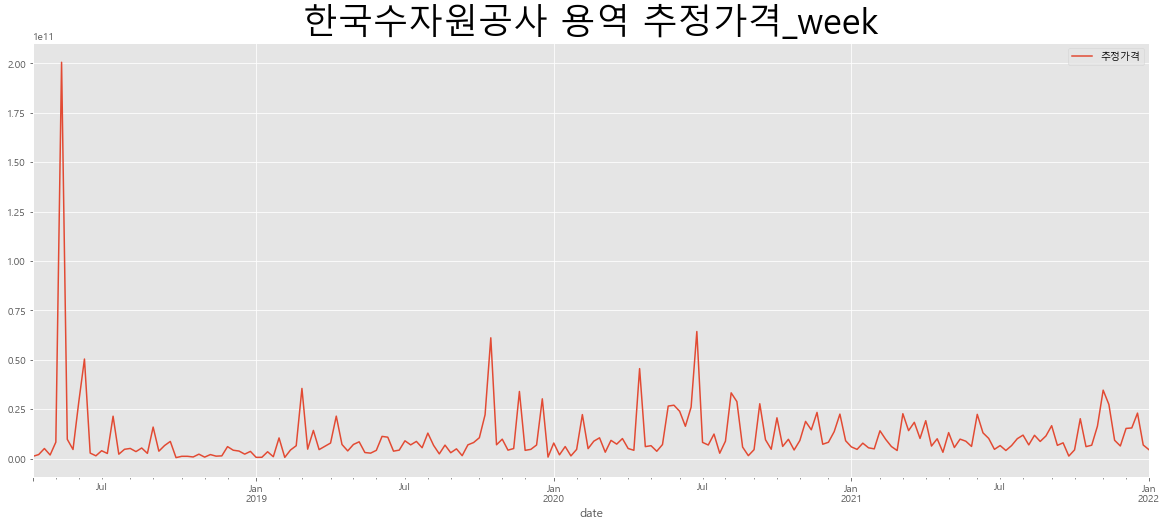

In [10]:
water_sample.plot(figsize=(20,8))
plt.title("한국수자원공사 용역 추정가격_week",fontsize=35)

검정통계량(ADF Statistics)가 Critical Value 보다 작으면 Stationary한 데이터
혹은 p-value가 설정한 신뢰수준 값 (0.05)보다 작으면 Stationary한 데이터

In [11]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(water_sample[1:])
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print('Critical values:')
for key, value in result[4].items():
    print('\t%s:%.3f'%(key,value))

ADF Statistic: -13.060865
p-value : 0.000000
Critical values:
	1%:-3.465
	5%:-2.877
	10%:-2.575


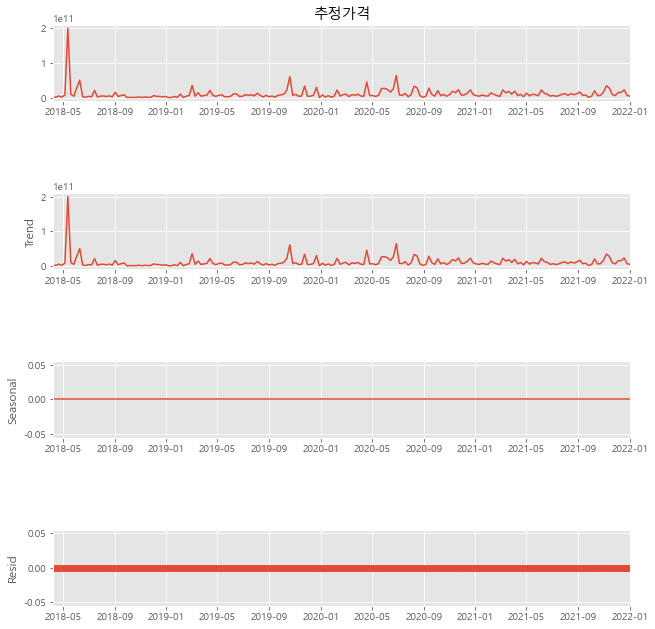

In [12]:
decomposition = sm.tsa.seasonal_decompose(water_sample['추정가격'],model='additive',period=1)
fig = decomposition.plot()
fig.set_size_inches(10,10)
plt.show()


# observed: 실제관측치에 대한 row data
# Trend
# Seasonal
# resi

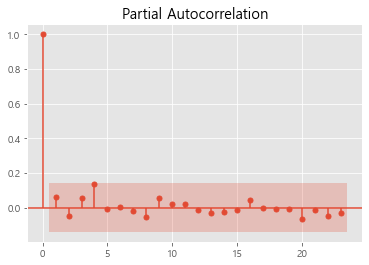

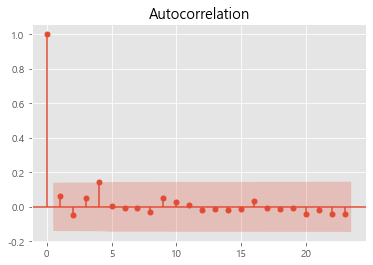

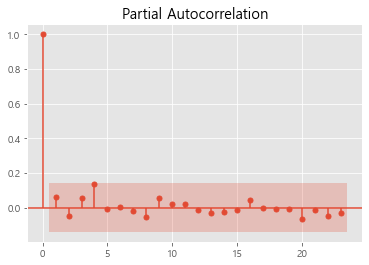

In [13]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(water_sample.추정가격)
plot_pacf(water_sample.추정가격)

<AxesSubplot:xlabel='date'>

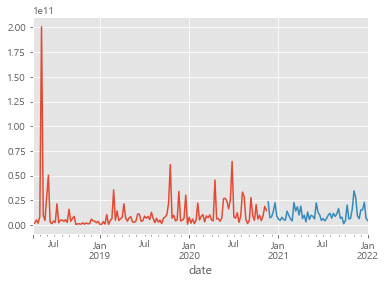

In [14]:
y_train = water_sample['추정가격'][:int(0.7*len(water_sample))]
y_test = water_sample['추정가격'][int(0.7*len(water_sample)):]
y_train.plot()
y_test.plot()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima.arima import ndiffs
import pmdarima as pm

kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)
print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 0


In [16]:
model = pm.auto_arima(y = y_train        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , D = 1
                      , start_p = 0 
                      , max_p = 5   
                      , start_q = 0 
                      , max_q = 5   
                      , m = 52       
                      , seasonal = True # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      #, trend = True
                      )
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=4285.685, Time=3.00 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=4333.344, Time=0.22 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=4275.414, Time=2.23 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=4251.124, Time=2.28 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=4279.681, Time=0.28 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=4251.653, Time=3.90 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=4251.278, Time=10.05 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=4253.205, Time=3.09 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=4253.238, Time=17.38 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=inf, Time=2.13 sec
 ARIMA(1,1,1)(0,1,1)[52]             : AIC=4251.911, Time=4.04 sec
 ARIMA(0,1,2)(0,1,1)[52]             : AIC=inf, Time=4.72 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=1.76 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=inf, Time=6.81 sec
 ARIMA(0,1,1)(0,1,1)[52] intercept   

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 52),
      suppress_warnings=True, with_intercept=False)

In [17]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  137
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 52)   Log Likelihood               -2122.562
Date:                            Wed, 23 Feb 2022   AIC                           4251.124
Time:                                    13:40:14   BIC                           4258.416
Sample:                                         0   HQIC                          4254.055
                                            - 137                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9534      0.193     -4.934      0.000      -1.332      -0.575
ma.S.L52      -0.5796      0.088   

Prob (Q) 값을 보면 0.21이므로 유의수준 0.05에서 귀무가설을 기각하지 못합니다. Ljung-Box (Q) 통계량의 귀무가설은 “잔차(residual)가 백색잡음(white noise) 시계열을 따른다”이므로, 위 결과를 통해 시계열 모형이 잘 적합되었고 남은 잔차는 더이상 자기상관을 가지지 않는 백색 잡음임을 확인할 수 있습니다.




Jarque-Bera (JB) 자크-베라 검정 통계량은 잔차가 정규성을 띠는지 검정한 통계량입니다.

Prob(JB)값을 보면 0.00으로 유의 수준 0.05에서 귀무가설을 기각합니다. Jarque-Bera (JB) 통계량의 귀무가설은 “잔차가 정규성을 만족한다”이므로, 위 결과를 통해 “잔차가 정규성을 따르지 않음”을 확인할 수 있습니다.


Heteroskedasticity (H) 이분산성 검정 통계량은 잔차가 이분산을 띠지 않는지 검정한 통계량입니다.


또한, 잔차가 정규분포를 따른다면, 경험적으로

비대칭도 (Skew)는 0에 가까워야 하고
첨도 (Kurtosis)는 3에 가까워야 합니다.


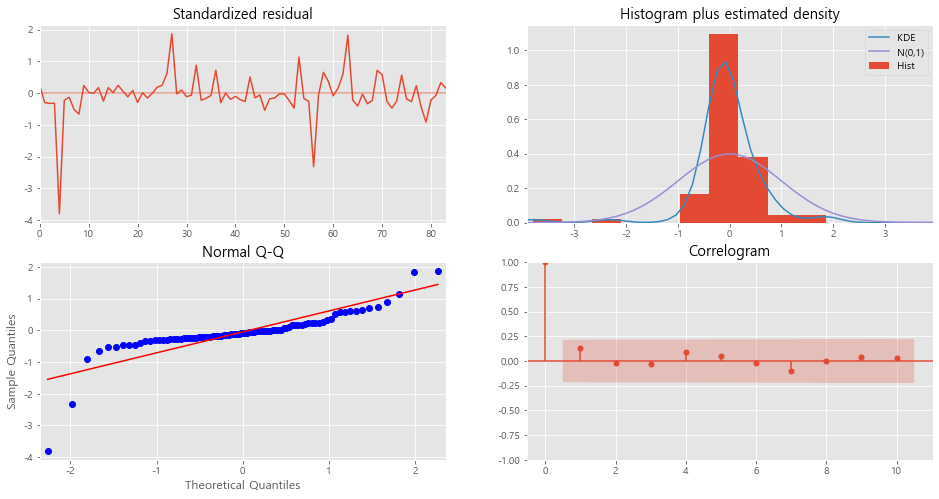

In [18]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

## 1차 모델 적합 후 검증

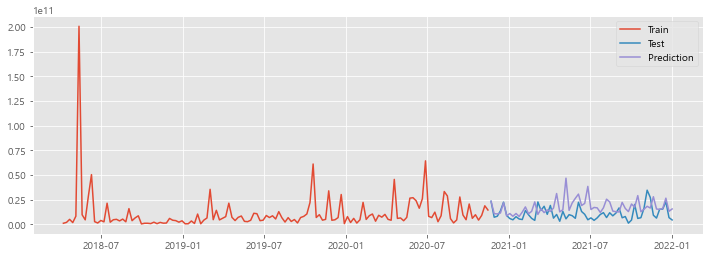

In [19]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

# 검증_full

-2.0752006490976576


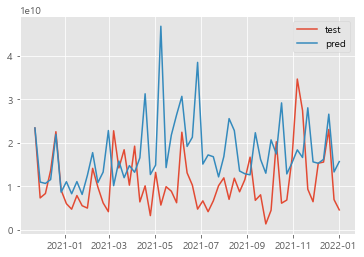

In [20]:
from sklearn.metrics import r2_score

y_test_temp_val = y_test
y_pred_temp_val = y_predict

R2 = r2_score(y_test_temp_val,y_pred_temp_val)
print(R2)

plt.plot(y_test_temp_val,label = "test")
plt.plot(y_pred_temp_val, label = "pred")
plt.legend()
plt.show()

In [21]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
print(f"MAPE: {MAPE(y_test_temp_val.values, y_pred_temp_val.values):.3f}")

MAPE: 142.120


In [22]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test_temp_val.values, y_pred_temp_val.values) 
np.sqrt(MSE)

11842718498.173597

# 검증_구간단축

In [23]:
from sklearn.metrics import r2_score

y_test_temp_val = y_test[:14]
y_pred_temp_val = y_predict[:14]

R2 = r2_score(y_test_temp_val,y_pred_temp_val)
print(R2)

0.5876697790324374


In [24]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
print(f"MAPE: {MAPE(y_test_temp_val.values, y_pred_temp_val.values):.3f}")

MAPE: 79.330


In [25]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test_temp_val.values, y_pred_temp_val.values) 
np.sqrt(MSE)

3786974675.9372177

In [26]:
y_test_temp_val # 13주, 약 3달

date
2020-11-22   23424679700.00
2020-11-29    7326889000.00
2020-12-06    8335266056.00
2020-12-13   13700659770.00
2020-12-20   22567972089.00
2020-12-27    9096184272.00
2021-01-03    5994957700.00
2021-01-10    4730643439.00
2021-01-17    7873530000.00
2021-01-24    5529304810.00
2021-01-31    4983520900.00
2021-02-07   14134096389.00
2021-02-14    9806356000.00
2021-02-21    6168386370.00
Freq: W-SUN, Name: 추정가격, dtype: float64

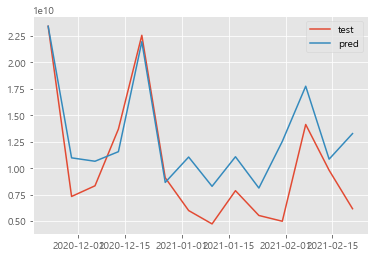

In [27]:
plt.plot(y_test_temp_val,label="test")
plt.plot(y_pred_temp_val,label="pred")
plt.legend()
plt.show()

이것이 저희가 원하는 예측 결과일까요? 왜 이렇게 예측되었을까요?

이에 대한 답은 이 곳 에서 찾을 수 있었습니다. auto_arima 모형으로 찾은 ARIMA 모형은 ARIMA (0,1,0) 모형으로, 1차 차분 시 백색 잡음인 모형입니다. 결국 아래 식처럼 상수항이 없는 임의 보행 모형 (Random Walk Model)을 따른다는 것을 알 수 있습니다.

 예측을 할 때 innovation term인 ϵt의 기댓값이 0이기 때문에 이 부분을 0으로 대체하게 됩니다. 따라서, 예측치들은 결국 가장 마지막 관측치가 되는 것이죠. 결국, ϵt 부분은 0으로 대체되고, 임의 보행 모형에서는 예측치들이 가장 마지막 관측치로 동일하기 때문에 일직선을 얻게 되는 것입니다.




따라서 한번에 테스트 데이터를 예측하는 것이 아니라, 한 스텝씩 예측하고, 테스트 데이터를 “관측”할 때마다 모형을 업데이트해주는 REFRESH 전략을 쓸 것입니다.

## 모델 refreshing 함수

In [28]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

# train set 학습시키고 test 를 해보자

In [29]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_train:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

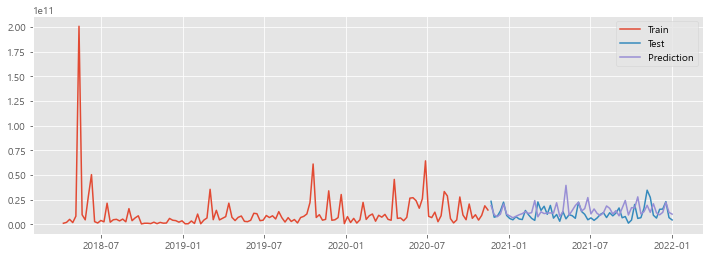

In [78]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

-0.9283040374251477


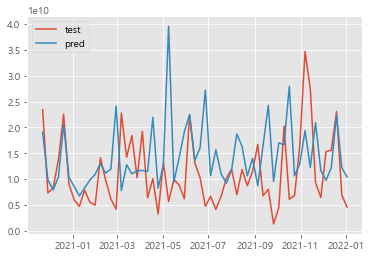

In [79]:
from sklearn.metrics import r2_score

y_test_temp_val = y_test
y_pred_temp_val = y_predict

R2 = r2_score(y_test_temp_val,y_pred_temp_val)
print(R2)

plt.plot(y_test_temp_val,label = "test")
plt.plot(y_pred_temp_val, label = "pred")
plt.legend()
plt.show()

# 검증_full

In [80]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
print(f"MAPE: {MAPE(y_test_temp_val.values, y_pred_temp_val.values):.3f}")

MAPE: 106.785


In [81]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test_temp_val.values, y_pred_temp_val.values) 
np.sqrt(MSE)

9377831663.067326

In [82]:
from sklearn.metrics import r2_score

y_test_temp_val = y_test[:14]
y_pred_temp_val = y_predict[:14]

R2 = r2_score(y_test_temp_val,y_pred_temp_val)
print(R2)

0.706272024606257


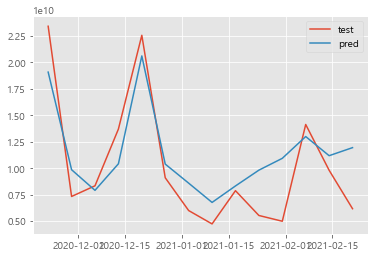

In [83]:
plt.plot(y_test_temp_val,label="test")
plt.plot(y_pred_temp_val,label="pred")
plt.legend()
plt.show()

# 검증_구간단축

In [84]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
print(f"MAPE: {MAPE(y_test_temp_val.values, y_pred_temp_val.values):.3f}")

MAPE: 64.927


In [85]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test_temp_val.values, y_pred_temp_val.values) 
np.sqrt(MSE)

3196262750.006605

In [32]:
y_pred_temp_val

,Prediction
date,
2020-11-22,23424042282.57
2020-11-29,10978939260.11
2020-12-06,10657444343.43
2020-12-13,11562018880.38
2020-12-20,21962018341.43
2020-12-27,8656335731.79
2021-01-03,11055612426.81
2021-01-10,8285633599.95
2021-01-17,11082297970.46


In [51]:
# 정규화 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
y_pred_sc=sc.fit_transform(y_pred_temp_val.values)

y_test_array = y_test_temp_val.values.reshape(-1,1)
y_test_sc=sc.fit_transform(y_test_array)


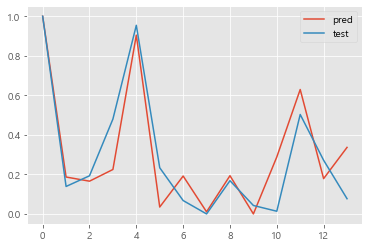

In [53]:
plt.plot(y_pred_sc,label="pred")
plt.plot(y_test_sc,label="test")
plt.legend()
plt.show()

In [2]:
!python --version

Python 3.9.7


In [54]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_pred_sc, y_test_sc) 
np.sqrt(MSE)

0.14525943648047354

In [56]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
print(f"MAPE: {MAPE(y_pred_sc, y_test_sc):.3f}")

MAPE: inf


In [57]:
R2 = r2_score(y_pred_sc,y_test_sc)
print(R2)

0.769622933808942
